# Regression Model with Keras to Predict Concrete Strength

In this project a dataset of the compressive strength of different samples of concrete will be explored, and concrete strength will be prdicted based on the volumes of different ingredients used for preperation. 
Ingredients include:

1. Cement
2. Blast Furnace Slag
3. Fly Ash
4. Water
5. Superplasticizer
6. Coarse Aggregate
7. Fine Aggregate

A simple Artificial neural networks (ANN) regression model will be built and used for predicting concrete compressive strength based on volumes of said ingredients.   
Thereafter, predictions will also be conducted using Scikit-learn Multi-Linear Regression model, and accuracy results will be compare to those of the ANN model. 

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

# 1. Download and Clean Dataset

 ## 1.1. Importing required libraries.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series

## 1.2. Download the data and read it into a pandas dataframe

In [147]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## 1.3. Check how many data points we have

In [148]:
concrete_data.shape

(1030, 9)

There are only approximately 1000 samples to train the model on, thus, we have to be careful not to overfit the training data.

## 1.4. Checking the dataset for any missing values.

In [149]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [150]:
display(concrete_data.isnull().head(10).sum())
display(concrete_data.isnull().head(10))

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


The data looks very clean and is ready to be used to build our model.

## 1.5. Exploring the scatterplot matrix of data

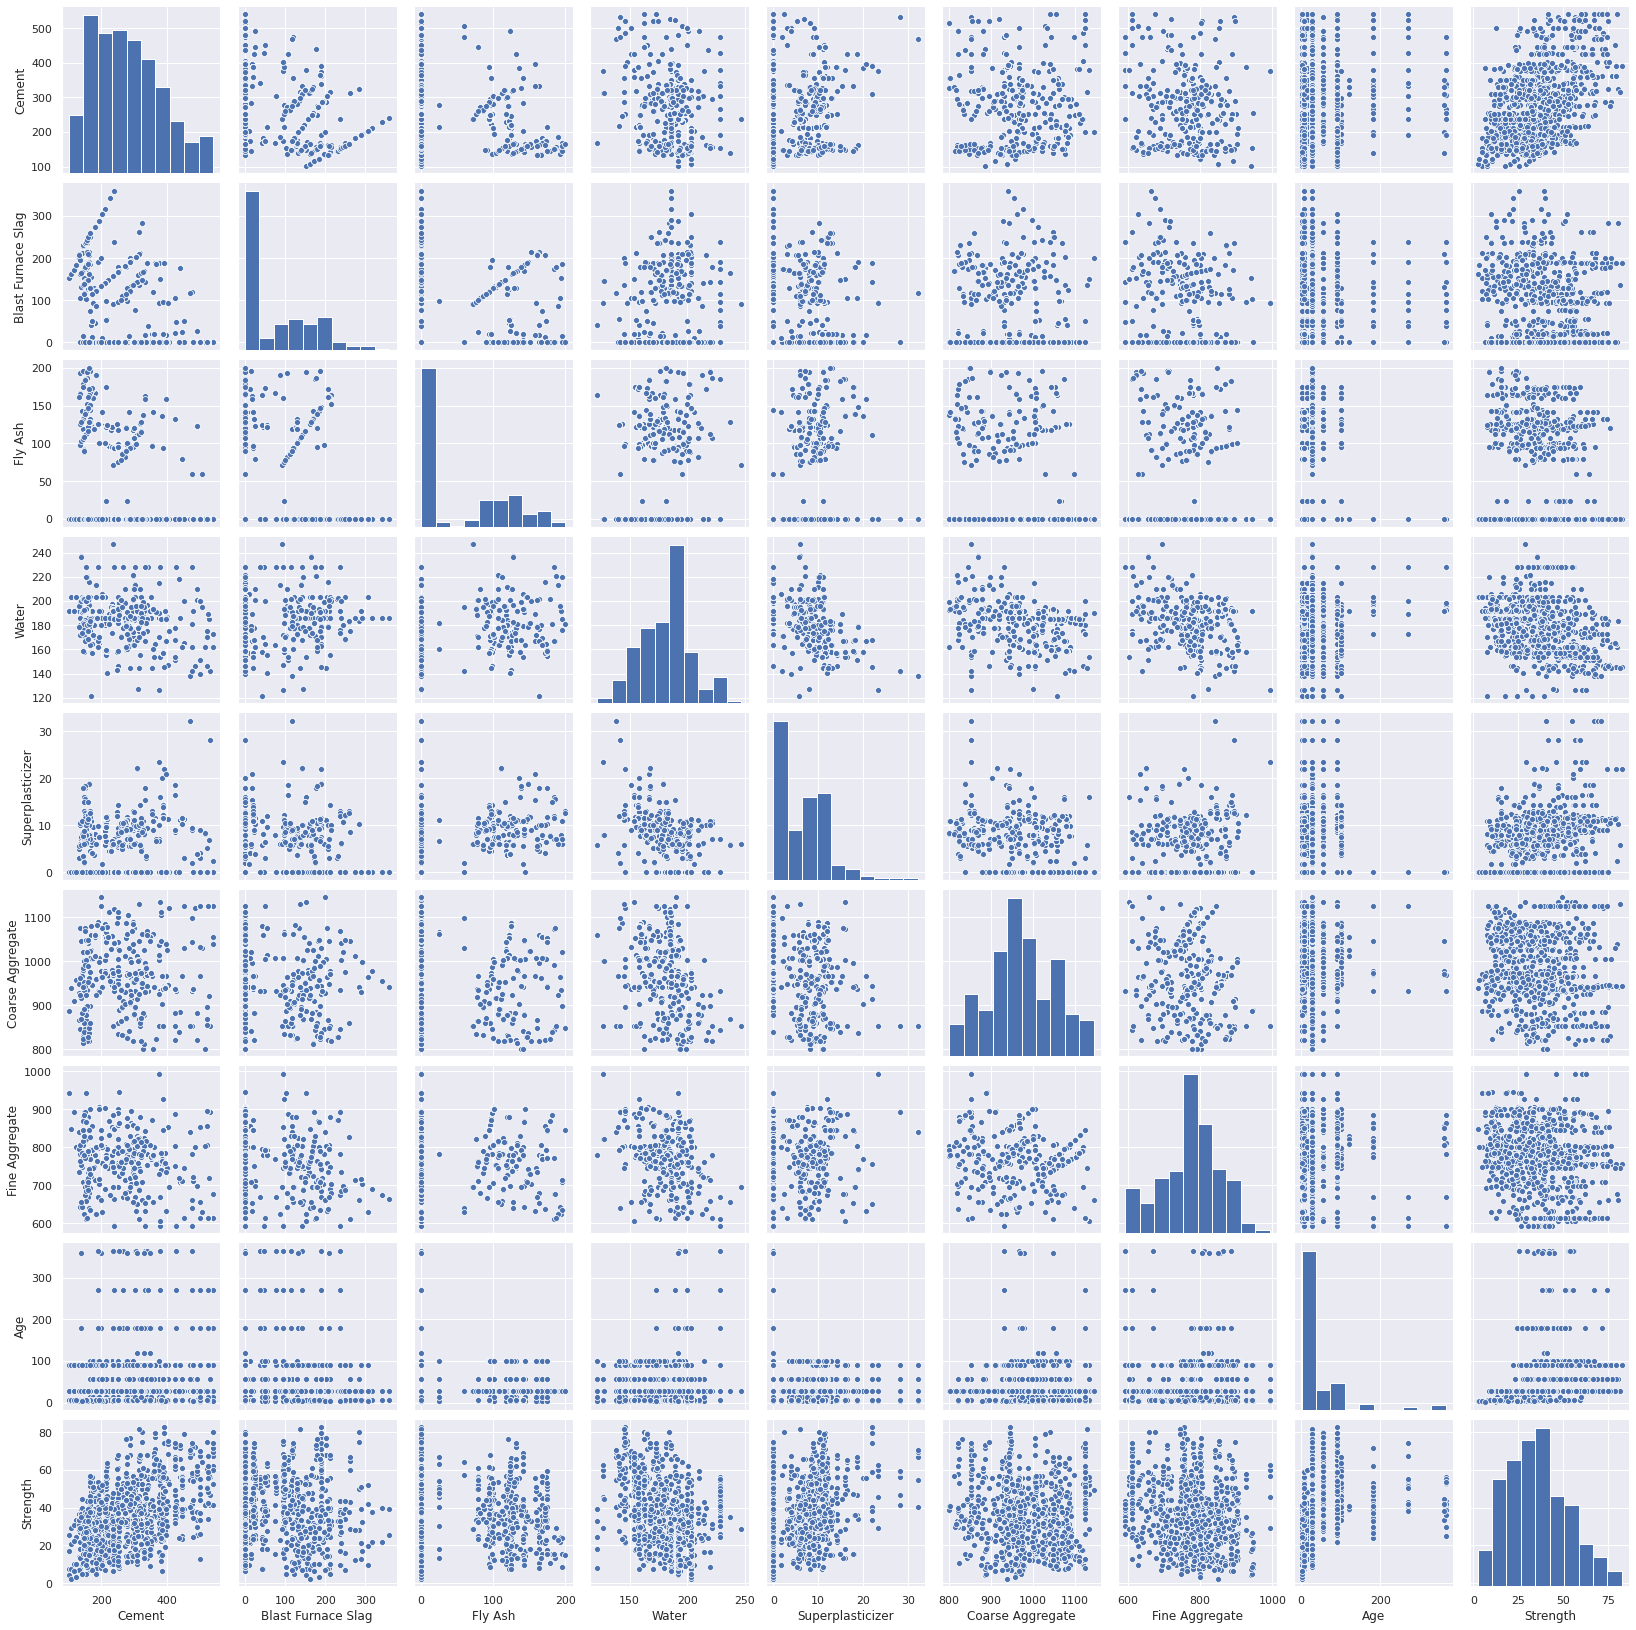

In [151]:
sns.pairplot(concrete_data)

## 1.6. Exploring the correlation between variables:

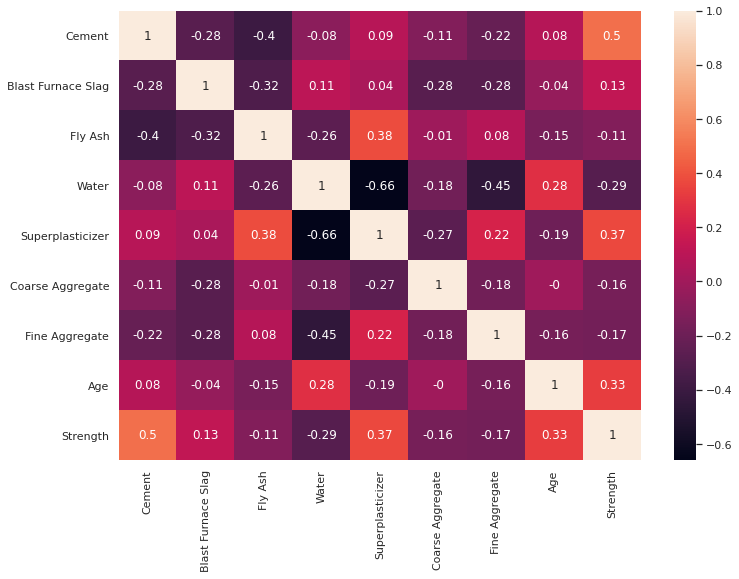

In [152]:
correlation_matrix = concrete_data.corr().round(2)
#display(correlation_matrix)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

# 2. Data preprocessing

## 2.1. Split data into predictors and target

The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.

In [0]:
concrete_data_columns = concrete_data.columns
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']]
target = concrete_data['Strength']

In [154]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [155]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

## 2.2. Normalizing the Data
##### substracting the mean and dividing by the standard deviation

In [156]:
predictors_norm = (predictors - predictors.mean())/predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


Saving the number of predictors to n_cols for using to build the network

In [0]:
n_cols = predictors_norm.shape[1] #number of predictors

# 3. Build a Neural Network (using TensorFlow backend)

### 3.1. Import Keras and required packages for building the regression model 

In [0]:
import keras

In [0]:
from keras.models import Sequential
from keras.layers import Dense

## 3.2. Defining a function that defines the built regression model 

In [0]:
# dfine regression model
def regression_model():
    #create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    #compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

The above function create a model that has two hidden layers, each of 50 hidden units

## 3.3. Train and Test Model

### 3.3.1. Splitting the data to train and test sets

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# creating train and test sets 
X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=4)

### 3.3.2. Calling the function to create a regression model

In [0]:
# build the model
model = regression_model()

### 3.3.3. Training and testing the model to find the optimal epochs 

In [165]:
from sklearn.metrics import r2_score
R2_list = list()
loss_list = list()

for i in np.arange(1,110,10):
    if i != 1:
        i-=1
    model.fit(X_train, y_train, epochs=i, verbose=1, validation_split=0.0, validation_data=(X_test, y_test))
    predicted_y = model.predict(X_test, verbose=0)
    
    R2 = r2_score(predicted_y, y_test)
    loss = model.evaluate(X_test, y_test)

    R2_list.append(R2)
    loss_list.append(loss)
    print("Epochs= ", str(i), "  Loss=", loss, "  R^2=", R2)
    


Train on 721 samples, validate on 309 samples
Epoch 1/1
309/309 [==============================] - 0s 48us/step
Epochs=  1   Loss= 1424.9168930300616   R^2= -4985.783061068395
Train on 721 samples, validate on 309 samples
Epoch 1/10
721/721 [==============================] - 0s 73us/step - loss: 1408.1487 - val_loss: 1285.1506
Epoch 2/10
721/721 [==============================] - 0s 80us/step - loss: 1219.3942 - val_loss: 1069.6048
Epoch 3/10
721/721 [==============================] - 0s 77us/step - loss: 942.0382 - val_loss: 777.4592
Epoch 4/10
721/721 [==============================] - 0s 84us/step - loss: 617.2212 - val_loss: 482.9390
Epoch 5/10
721/721 [==============================] - 0s 86us/step - loss: 364.5481 - val_loss: 301.1526
Epoch 6/10
721/721 [==============================] - 0s 77us/step - loss: 248.4081 - val_loss: 245.6298
Epoch 7/10
721/721 [==============================] - 0s 75us/step - loss: 216.1598 - val_loss: 228.6325
Epoch 8/10
721/721 [===================

### 3.3.4. Printing the R^2 and Loss list

In [166]:
print(R2_list)
print(loss_list)

[-4985.783061068395, -0.17386436971354602, 0.20228694721598683, 0.5335221334547657, 0.8135898279153191, 0.8608096949481632, 0.8819643488392497, 0.8907412018200368, 0.8996611189097671, 0.8991453347769915, 0.9053193987942908]
[1424.9168930300616, 198.9749922274, 145.93980748445085, 97.76810578775252, 47.4349198449391, 38.05084870471152, 33.23833579152919, 31.4578945196948, 29.740229412189965, 28.765086238824047, 28.662494165611886]


The first 3 values give vert not optimized scores, and thus won't be plotted in the next step

### 3.3.5. Plottin the R^2 and loss (RMS) values as a function of epoch number

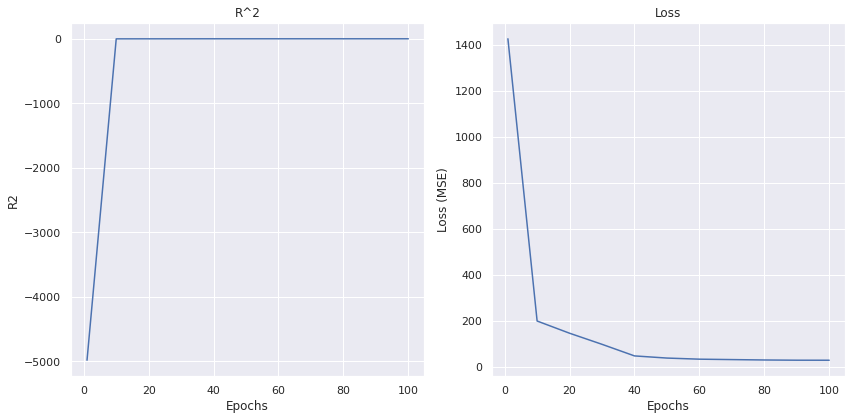

Epochs = 20 give the highest R^2 with value of 0.9053193987942908
Epochs = 20 give the lowest loss score with RMS value of 28.662494165611886

Epochs = 20 give R^2 value of 0.9053193987942908 and loss value of 28.662494165611886


In [179]:
# fitting the model using the train set, and 100 epochs. Validation is being performed by using the test set as arguments of the validation_data parameters) 

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
#plt.plot(range(0,100),R2_list)
plt.plot(np.concatenate((np.array(1), np.arange(10,110,10)), axis=None, out=None),R2_list)
plt.ylabel('R2')
plt.xlabel('Epochs')
plt.tight_layout()
plt.title("R^2")

plt.subplot(1,2,2)
plt.plot(np.concatenate((np.array(1), np.arange(10,110,10)), axis=None, out=None),loss_list)
plt.ylabel('Loss (MSE)')
plt.xlabel('Epochs')
plt.tight_layout()
plt.title("Loss")

plt.show()

print("Epochs =", np.array(R2_list).argmax()+10,"give the highest R^2 with value of", np.array(R2_list).max())
print("Epochs =", np.array(loss_list).argmin()+10,"give the lowest loss score with RMS value of", np.array(loss_list).min())
print("\nEpochs =", np.array(R2_list).argmax()+10, "give R^2 value of", R2_list[np.array(R2_list).argmax()], "and loss value of", loss_list[np.array(R2_list).argmax()])

### 3.3.6. Training the model with the optimal epochs

In [169]:
# fitting the model using the train set, and 66 epochs. Validation is being performed by using the test set as arguments of the validation_data parameters)
model.fit(X_train, y_train, epochs=20, verbose=2, validation_split=0.0, validation_data=(X_test, y_test))

Train on 721 samples, validate on 309 samples
Epoch 1/20
 - 0s - loss: 9.8095 - val_loss: 28.4078
Epoch 2/20
 - 0s - loss: 10.5255 - val_loss: 29.0357
Epoch 3/20
 - 0s - loss: 10.1422 - val_loss: 29.7688
Epoch 4/20
 - 0s - loss: 9.9060 - val_loss: 28.6207
Epoch 5/20
 - 0s - loss: 9.6502 - val_loss: 29.2384
Epoch 6/20
 - 0s - loss: 9.9893 - val_loss: 29.0064
Epoch 7/20
 - 0s - loss: 9.7747 - val_loss: 28.4537
Epoch 8/20
 - 0s - loss: 9.6504 - val_loss: 28.9604
Epoch 9/20
 - 0s - loss: 9.7179 - val_loss: 29.3648
Epoch 10/20
 - 0s - loss: 9.6855 - val_loss: 28.4310
Epoch 11/20
 - 0s - loss: 9.5629 - val_loss: 28.7860
Epoch 12/20
 - 0s - loss: 10.1999 - val_loss: 29.4564
Epoch 13/20
 - 0s - loss: 10.2399 - val_loss: 28.1833
Epoch 14/20
 - 0s - loss: 10.0946 - val_loss: 28.3040
Epoch 15/20
 - 0s - loss: 9.7953 - val_loss: 29.4682
Epoch 16/20
 - 0s - loss: 10.0050 - val_loss: 28.3651
Epoch 17/20
 - 0s - loss: 9.9199 - val_loss: 29.2241
Epoch 18/20
 - 0s - loss: 9.6543 - val_loss: 29.0786
Epo

### 3.3.8. Predicting model output (using the test set)

In [172]:
predicted_y = model.predict(X_test, verbose=1)

309/309 [==============================] - 0s 74us/step


## 3.4.  Eveluation model accuracy  

### 3.4.1. Eveluating model accuracy by R2

In [177]:
R2 = r2_score(predicted_y, y_test)
print('R^2: %.3f' %R2)

R^2: 0.903


### 3.4.2. Ploting the scatter of predicted values vs. actual values (out of test set)

Text(0.5, 1.0, 'Artificial neural networks (ANN)\nActuval vs. Predicted Concrete Strength Values')

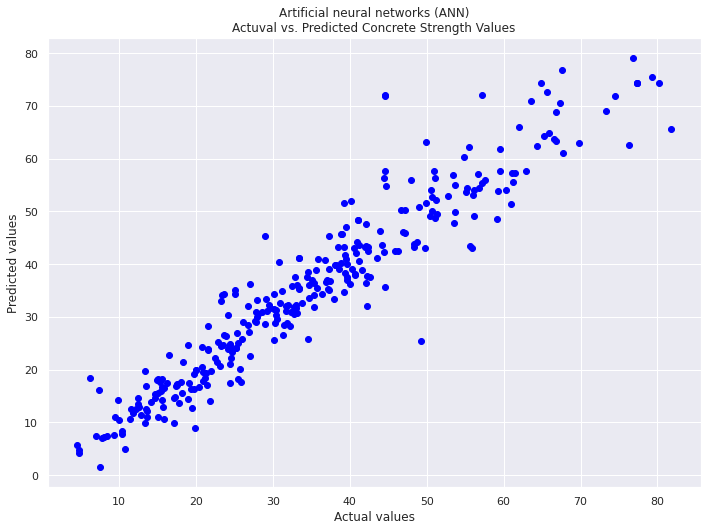

In [174]:
plt.scatter(y_test, predicted_y,  color='blue')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Artificial neural networks (ANN)\nActuval vs. Predicted Concrete Strength Values")

### The ANN model yeild predictions with accuracy of ~90%



## 3.5. Comparing, Describing and Ploting the Predicted vs. Actual Values

   

### 3.5.1 Checking if the range of actual and predicted values overlap

,Actual_values,Predicted_values
count,309.000000,309.000000
mean,35.020906,35.320194
std,17.245587,17.510792
min,4.570000,1.589530
25%,21.540000,20.510216
50%,33.090000,34.438801
75%,44.700000,46.239552
max,81.750000,79.041557


Text(0.5, 1.0, 'Artificial neural networks (ANN)\nActuval vs. Predicted Concrete Strength Values')

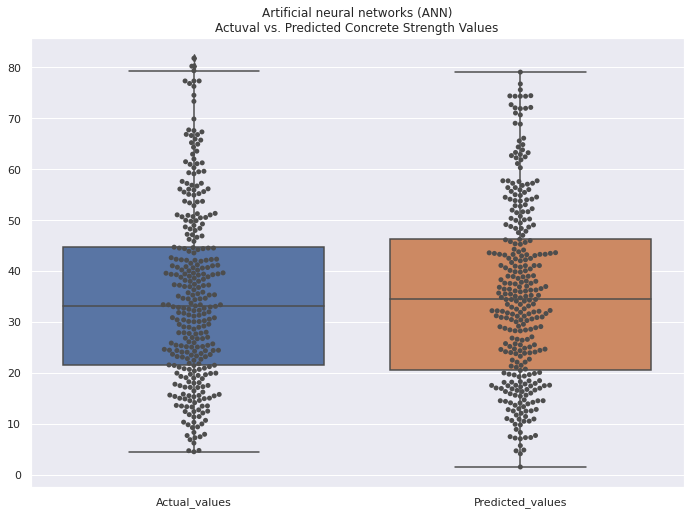

In [206]:
y_test = np.array(y_test)
predicted_y = np.array(predicted_y).reshape(len(predicted_y))

df = pd.DataFrame({'Actual_values':y_test, 'Predicted_values':predicted_y})
display(df.describe())
box_plot = sns.boxplot(data=df)
box_plot = sns.swarmplot(data=df, color=".3")
plt.title("Artificial neural networks (ANN)\nActuval vs. Predicted Concrete Strength Values")


### 3.5.2. Hypothesis testing - examining differences between means of actual and predicted values

In [207]:
from scipy import stats
ttest = stats.ttest_ind(df['Actual_values'], df['Predicted_values'])
print("P-value between actual and predicted values: %.2f " %ttest[1])

P-value between actual and predicted values: 0.83 


#### The mean actual and predicted values are not significantly different

## The model yields ~90% accuracy, with mean predicted values similar to actual values 

# 4. Predicting Concrete Strength using Scikit-learn Multi-Linear Regression  

 ## 4.1. Choosing model class (LinearRegression) and fitting the model to the data

In [0]:
from sklearn import linear_model
multi_lin_regr = linear_model.LinearRegression()
multi_lin_regr.fit (X_train, y_train)
# The coefficients
print ('Coefficients: ', multi_lin_regr.coef_)
print ('\nIntercept: ', multi_lin_regr.intercept_)

Coefficients:  [11.96203536  8.51411609  5.121951   -4.10196627  1.14486982  0.47493144
  1.00562106  7.02153884]

Intercept:  36.15318933464654


## 4.2. Predicting the output and eveluating model accuracy by R2

In [0]:
# make prediction
MLR_y_pred = multi_lin_regr.predict(X_test)

In [0]:
#eveluating model accuracy
r2_score(MLR_y_pred, y_test)
MLR_R2 = r2_score(MLR_y_pred, y_test)
print('R^2: %.2f' %MLR_R2)

R^2: 0.29


## 4.3. Ploting the scatter of predicted values vs. actual values (out of test set)

Text(0.5, 1.0, 'Multi Linear Regression\nActuval vs. Predicted Concrete Strength Values')

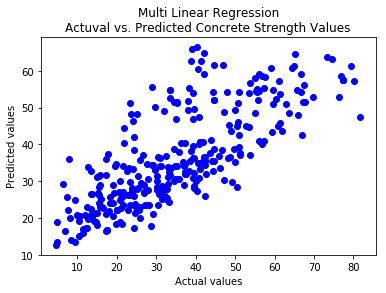

In [0]:
plt.scatter(y_test, MLR_y_pred,  color='blue')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Multi Linear Regression\nActuval vs. Predicted Concrete Strength Values")

## The multi linear regression model yeilds poor predictions accuracy (29%), as compared to accuracy of the ANN regression model(88%)

## 4.4. Comparing, Describing and Ploting the Predicted vs. Actual Values

### 4.4.1. Checking if the range of actual and predicted values overlap:   

,Actual_values,Predicted_values
count,309.000000,309.000000
mean,35.020906,36.138333
std,17.245587,13.133453
min,4.570000,12.766821
25%,21.540000,25.910991
50%,33.090000,33.821849
75%,44.700000,46.888000
max,81.750000,66.337849


Text(0.5, 1.0, 'Multi Linear Regression\nActuval vs. Predicted Concrete Strength Values')

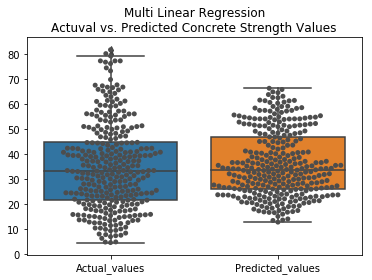

In [0]:
df2 = pd.DataFrame({'Actual_values':y_test, 'Predicted_values':MLR_y_pred})
display(df2.describe())
box_plot = sns.boxplot(data=df2)
box_plot = sns.swarmplot(data=df2, color=".3")
plt.title("Multi Linear Regression\nActuval vs. Predicted Concrete Strength Values")

### 4.4.2. Hypothesis testing - examining differences between means of actual and predicted values

In [0]:
from scipy import stats
ttest = stats.ttest_ind(df2['Actual_values'], df2['Predicted_values'])
print("P-value between actual and predicted values: %.2f " %ttest[1])

P-value between actual and predicted values: 0.37 


#### The mean actual and predicted values are not significantly different